## Abalone sea snails (Example 4 in slides, with extended dataset)

Consider a population of Abalone, a type of marine snail with colorful
shells featuring a varying number of rings. Our goal is to predict the
sex, male or female, of the Abalone from the number of rings on
the shell.

In [1]:
# load data
import pandas as pd
import numpy as np

data = pd.read_csv('./abalone.csv')

### Data visualization

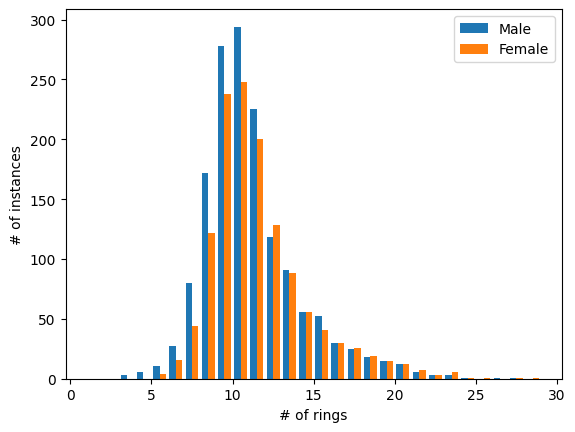

In [2]:
import matplotlib.pyplot as plt

plt.hist([
    data['Rings'][data['Sex']=='M'],
    data['Rings'][data['Sex']=='F']
    ], bins=np.arange(1,30),
    label=['Male', 'Female'])
plt.xlabel('# of rings')
plt.ylabel('# of instances')
plt.legend()
plt.show()

### Minimum Error Rule

Write function that takes as an input number of rings and outputs `Female` or `Male` based on the minimum error rule. You can assume that number of rings is an integer between 1 and 29.

In [3]:
# data preprocessing
number_of_rings_males = data['Rings'][data['Sex']=='M']
number_of_rings_females = data['Rings'][data['Sex']=='F']

# Solution
cum_males = [0 for i in range(1,30)]
for num_rings in number_of_rings_males:
    cum_males[num_rings-1] += 1

cum_females = [0 for i in range(1,30)]
for num_rings in number_of_rings_females:
    cum_females[num_rings-1] += 1

def min_error_rule(num_rings):
    if cum_females[num_rings-1] <= cum_males[num_rings-1]:
        return 'Male'
    return 'Female'

### Desicion Rule

In [4]:
for num_rings in range(1,30):
    print(f'# of rings: {num_rings}, prediction: {min_error_rule(num_rings)}')

# of rings: 1, prediction: Male
# of rings: 2, prediction: Male
# of rings: 3, prediction: Male
# of rings: 4, prediction: Male
# of rings: 5, prediction: Male
# of rings: 6, prediction: Male
# of rings: 7, prediction: Male
# of rings: 8, prediction: Male
# of rings: 9, prediction: Male
# of rings: 10, prediction: Male
# of rings: 11, prediction: Male
# of rings: 12, prediction: Female
# of rings: 13, prediction: Male
# of rings: 14, prediction: Male
# of rings: 15, prediction: Male
# of rings: 16, prediction: Male
# of rings: 17, prediction: Female
# of rings: 18, prediction: Female
# of rings: 19, prediction: Male
# of rings: 20, prediction: Male
# of rings: 21, prediction: Female
# of rings: 22, prediction: Male
# of rings: 23, prediction: Female
# of rings: 24, prediction: Male
# of rings: 25, prediction: Female
# of rings: 26, prediction: Male
# of rings: 27, prediction: Male
# of rings: 28, prediction: Male
# of rings: 29, prediction: Female


### Fit Skew Normal Distribution to the data for males and females

In [5]:
from scipy.stats import skewnorm
import matplotlib.pyplot as plt

# use scipy's skewnorm to fit the data
a_m, loc_m, scale_m = skewnorm.fit(number_of_rings_males)
a_f, loc_f, scale_f = skewnorm.fit(number_of_rings_females)

### Visualize fit

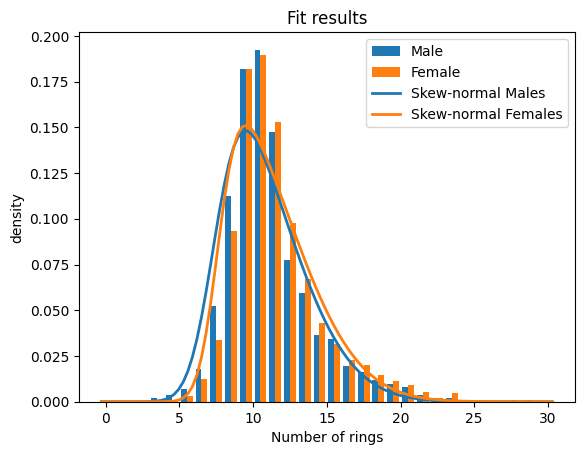

In [6]:
plt.hist([
    data['Rings'][data['Sex']=='M'],
    data['Rings'][data['Sex']=='F']
    ], bins=np.arange(1,30), density=True,
    label=['Male', 'Female'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf_m = skewnorm.pdf(x, a_m, loc_m, scale_m)
pdf_f = skewnorm.pdf(x, a_f, loc_f, scale_f)
plt.plot(x, pdf_m, 'C0', linewidth=2, label=f'Skew-normal Males')
plt.plot(x, pdf_f, 'C1', linewidth=2, label=f'Skew-normal Females')
plt.title("Fit results")
plt.legend()
plt.xlabel('Number of rings')
plt.ylabel('density')
plt.legend()
plt.show()

Design the minimal error rule under assumption that the number of rings is distributed according to the skew normal distribution.

In [7]:
p_m = len(number_of_rings_males) / (len(number_of_rings_males) + len(number_of_rings_females))
p_f = 1 - p_m

# Using Bayes' rule
def min_error_rule_skew(num_rings):
    if skewnorm.pdf(num_rings, a_m, loc_m, scale_m) * p_m >= \
            skewnorm.pdf(num_rings, a_f, loc_f, scale_f) * p_f:
        return 'Male'
    return 'Female'

Compare both rules, do they lead to the same decision?

In [8]:
for num_rings in range(1,30):
    print(f'# of rings: {num_rings}, predictions (Original/Skew): {min_error_rule(num_rings)} / {min_error_rule_skew(num_rings)}')

# of rings: 1, predictions (Original/Skew): Male / Male
# of rings: 2, predictions (Original/Skew): Male / Male
# of rings: 3, predictions (Original/Skew): Male / Male
# of rings: 4, predictions (Original/Skew): Male / Male
# of rings: 5, predictions (Original/Skew): Male / Male
# of rings: 6, predictions (Original/Skew): Male / Male
# of rings: 7, predictions (Original/Skew): Male / Male
# of rings: 8, predictions (Original/Skew): Male / Male
# of rings: 9, predictions (Original/Skew): Male / Male
# of rings: 10, predictions (Original/Skew): Male / Male
# of rings: 11, predictions (Original/Skew): Male / Male
# of rings: 12, predictions (Original/Skew): Female / Male
# of rings: 13, predictions (Original/Skew): Male / Male
# of rings: 14, predictions (Original/Skew): Male / Male
# of rings: 15, predictions (Original/Skew): Male / Male
# of rings: 16, predictions (Original/Skew): Male / Female
# of rings: 17, predictions (Original/Skew): Female / Female
# of rings: 18, predictions (Ori